In [8]:
%pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
import os
import numpy as np

# Add parent directory to sys.path so "src" is visible
sys.path.append(os.path.abspath(".."))

# Ab normal import karo
from src.preprocessing import process_dataset

In [ ]:
# Check karo ki "src" directory accessible hai ya nahi
!ls ../
!pip install seaborn

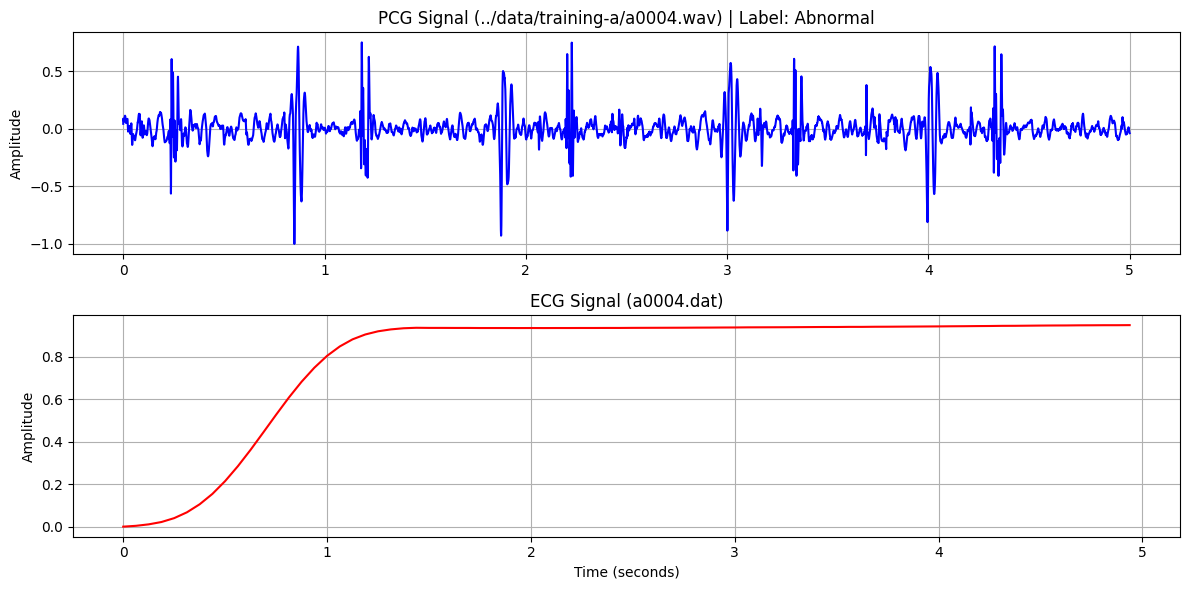

In [21]:
from src.visualization import visualize_pcg_ecg

visualize_pcg_ecg("../data/training-a/a0004.wav", "../data/training-a/a0004.hea", duration=5)

In [28]:
# === Cell 2: Preprocess Dataset === (Resample + Segmentation + Features + Labels)
data_dirs = [
    "../data/training-a/",
    "../data/training-b/",
    "../data/training-c/",
    "../data/training-d/",
    "../data/training-e/",
    "../data/training-f/"
]

X, y = process_dataset(data_dirs)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y, return_counts=True))


=== Using FINAL process_dataset (with .hea labels) ===


Feature matrix shape: (3240, 4)
Labels shape: (3240,)
Unique labels: (array([0, 1]), array([2575,  665]))


In [29]:
# === Cell 3: Handle Class Imbalance ===

# Install imbalanced-learn inside notebook
%pip install -q imbalanced-learn

import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assume X, y already ban gaye hain preprocessing se
print("Original class distribution:", np.unique(y, return_counts=True))

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before resampling:")
print("Train:", np.unique(y_train, return_counts=True))
print("Test :", np.unique(y_test, return_counts=True))

# Oversampling (only on training set)
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("\nAfter resampling (train set):")
print("Train:", np.unique(y_train_res, return_counts=True))
print("Test :", np.unique(y_test, return_counts=True))


Note: you may need to restart the kernel to use updated packages.
Original class distribution: (array([0, 1]), array([2575,  665]))
Before resampling:
Train: (array([0, 1]), array([2060,  532]))
Test : (array([0, 1]), array([515, 133]))

After resampling (train set):
Train: (array([0, 1]), array([2060, 2060]))
Test : (array([0, 1]), array([515, 133]))


In [51]:
# === Cell 4: Train Logistic Regression with 10-fold CV ===
from src.train_lr import train_logreg

results = train_logreg(X, y, n_splits=10)
print("\n=== Cross-validation Results ===")
print("Average Accuracy:", results["average_accuracy"])
print("Average Sensitivity:", results["average_sensitivity"])
print("Average Specificity:", results["average_specificity"])
print("Average Score:", results["average_score"])



=== Cross-validation Results ===
Average Accuracy: 0.6432098765432098
Average Sensitivity: 0.636847341658728
Average Specificity: 0.6677069099038853
Average Score: 0.6522771257813066


In [55]:
# === Cell 4: Reload and Train Logistic Regression with 10-fold CV ===
import importlib
import src.train_lr as train_lr

# reload to ensure latest changes
importlib.reload(train_lr)

results = train_lr.train_logreg(X, y, n_splits=10)

print("\n=== Cross-validation Results ===")
print("Average Accuracy:", results["average_accuracy"])
print("Average Sensitivity:", results["average_sensitivity"])
print("Average Specificity:", results["average_specificity"])
print("Average Score:", results["average_score"])

print("\n=== All Confusion Matrices ===")
for i, cm in enumerate(results["conf_matrices"], 1):
    print(f"Fold {i} Confusion Matrix:\n{np.array(cm)}\n")



=== Fold 1 ===
Confusion Matrix:
 [[139 118]
 [ 21  46]]
Accuracy: 0.5710, Sensitivity: 0.6866, Specificity: 0.5409, Score: 0.6137

=== Fold 2 ===
Confusion Matrix:
 [[160  97]
 [ 28  39]]
Accuracy: 0.6142, Sensitivity: 0.5821, Specificity: 0.6226, Score: 0.6023

=== Fold 3 ===
Confusion Matrix:
 [[158  99]
 [ 22  45]]
Accuracy: 0.6265, Sensitivity: 0.6716, Specificity: 0.6148, Score: 0.6432

=== Fold 4 ===
Confusion Matrix:
 [[167  90]
 [ 21  46]]
Accuracy: 0.6574, Sensitivity: 0.6866, Specificity: 0.6498, Score: 0.6682

=== Fold 5 ===
Confusion Matrix:
 [[164  93]
 [ 21  46]]
Accuracy: 0.6481, Sensitivity: 0.6866, Specificity: 0.6381, Score: 0.6623

=== Fold 6 ===
Confusion Matrix:
 [[168  90]
 [ 20  46]]
Accuracy: 0.6605, Sensitivity: 0.6970, Specificity: 0.6512, Score: 0.6741

=== Fold 7 ===
Confusion Matrix:
 [[176  82]
 [ 18  48]]
Accuracy: 0.6914, Sensitivity: 0.7273, Specificity: 0.6822, Score: 0.7047

=== Fold 8 ===
Confusion Matrix:
 [[178  80]
 [ 26  40]]
Accuracy: 0.6728, 

=== Fold-wise Results ===


,Accuracy,Sensitivity,Specificity,Score,Confusion_Matrix
0,0.570988,0.686567,0.540856,0.613712,"[[139, 118], [21, 46]]"
1,0.614198,0.582090,0.622568,0.602329,"[[160, 97], [28, 39]]"
2,0.626543,0.671642,0.614786,0.643214,"[[158, 99], [22, 45]]"
3,0.657407,0.686567,0.649805,0.668186,"[[167, 90], [21, 46]]"
4,0.648148,0.686567,0.638132,0.662350,"[[164, 93], [21, 46]]"
5,0.660494,0.696970,0.651163,0.674066,"[[168, 90], [20, 46]]"
6,0.691358,0.727273,0.682171,0.704722,"[[176, 82], [18, 48]]"
7,0.672840,0.606061,0.689922,0.647992,"[[178, 80], [26, 40]]"
8,0.660494,0.651515,0.662791,0.657153,"[[171, 87], [23, 43]]"
9,0.629630,0.681818,0.616279,0.649049,"[[159, 99], [21, 45]]"


<Figure size 1200x600 with 0 Axes>

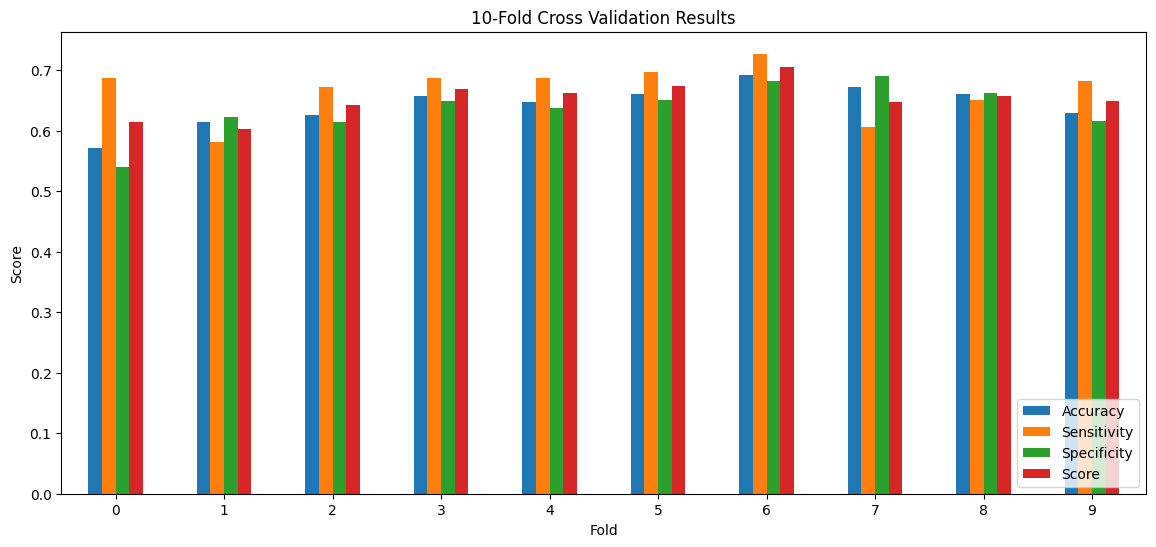

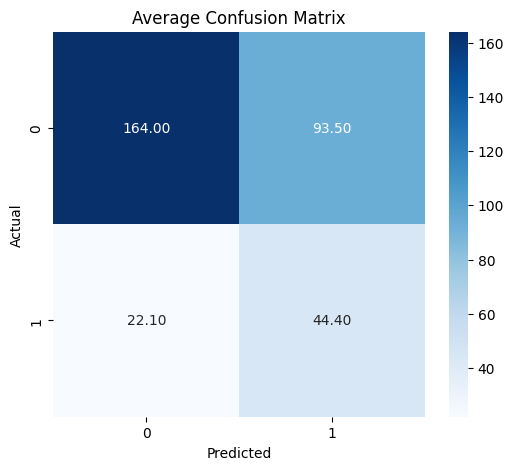

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results dict ko DataFrame me convert karna
results_df = pd.DataFrame({
    "Accuracy": results["accuracies"],
    "Sensitivity": results["sensitivities"],
    "Specificity": results["specificities"],
    "Score": results["scores"],
    "Confusion_Matrix": results["conf_matrices"]
})

print("=== Fold-wise Results ===")
display(results_df)

# --- Bar Plot of Metrics ---
plt.figure(figsize=(12, 6))
results_df[["Accuracy", "Sensitivity", "Specificity", "Score"]].plot(kind="bar", figsize=(14,6))
plt.title("10-Fold Cross Validation Results")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

# --- Average Confusion Matrix ---
import numpy as np
avg_cm = np.mean(np.array(results["conf_matrices"]), axis=0)

plt.figure(figsize=(6,5))
sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
